In [1]:
# Evaluation Projects
# Name : Sayyed Mudassar Iqbal Shakil Ahmed
# Batch : DSG2404
# Subject : Loan Application Project 2 Solution

# Importing Libraries 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Loading Dataset

In [4]:

df=pd.read_csv(r'C:\Users\HP\Desktop\Mudassar\FlipRobo Internship\Evaluation Projects\Project 2\loan_prediction.csv')

In [5]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# EDA

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

In [8]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

Dataset doesnot contain Any duplicate ENTRY.

### Datatype Check

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- The loan application status dataset contains 614 rows and 13 columns, including the target variable.
  - The target variable is 'Loan_Status', which has an object datatype and is categorical.
  - The categorical features include Gender, Married, Education, Self Employed, Credit History, and Loan Status.
  - The dataset consists of three types of datatypes: float64 (4), int64 (1), and object (8).


### Missing value check 

<Axes: >

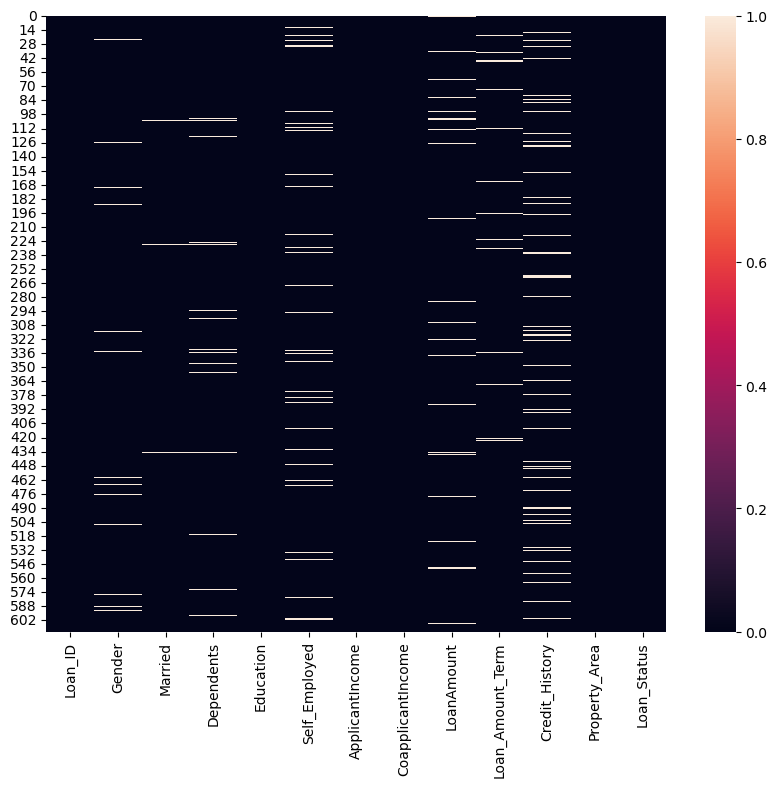

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000



    - 7 out 13 columns contains missing value.
    - As small amount of data is missing so we use mean amd mode to replace with NaN values.
    
<b> Lets explore categorical features before missing value imputation.</b>

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [12]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


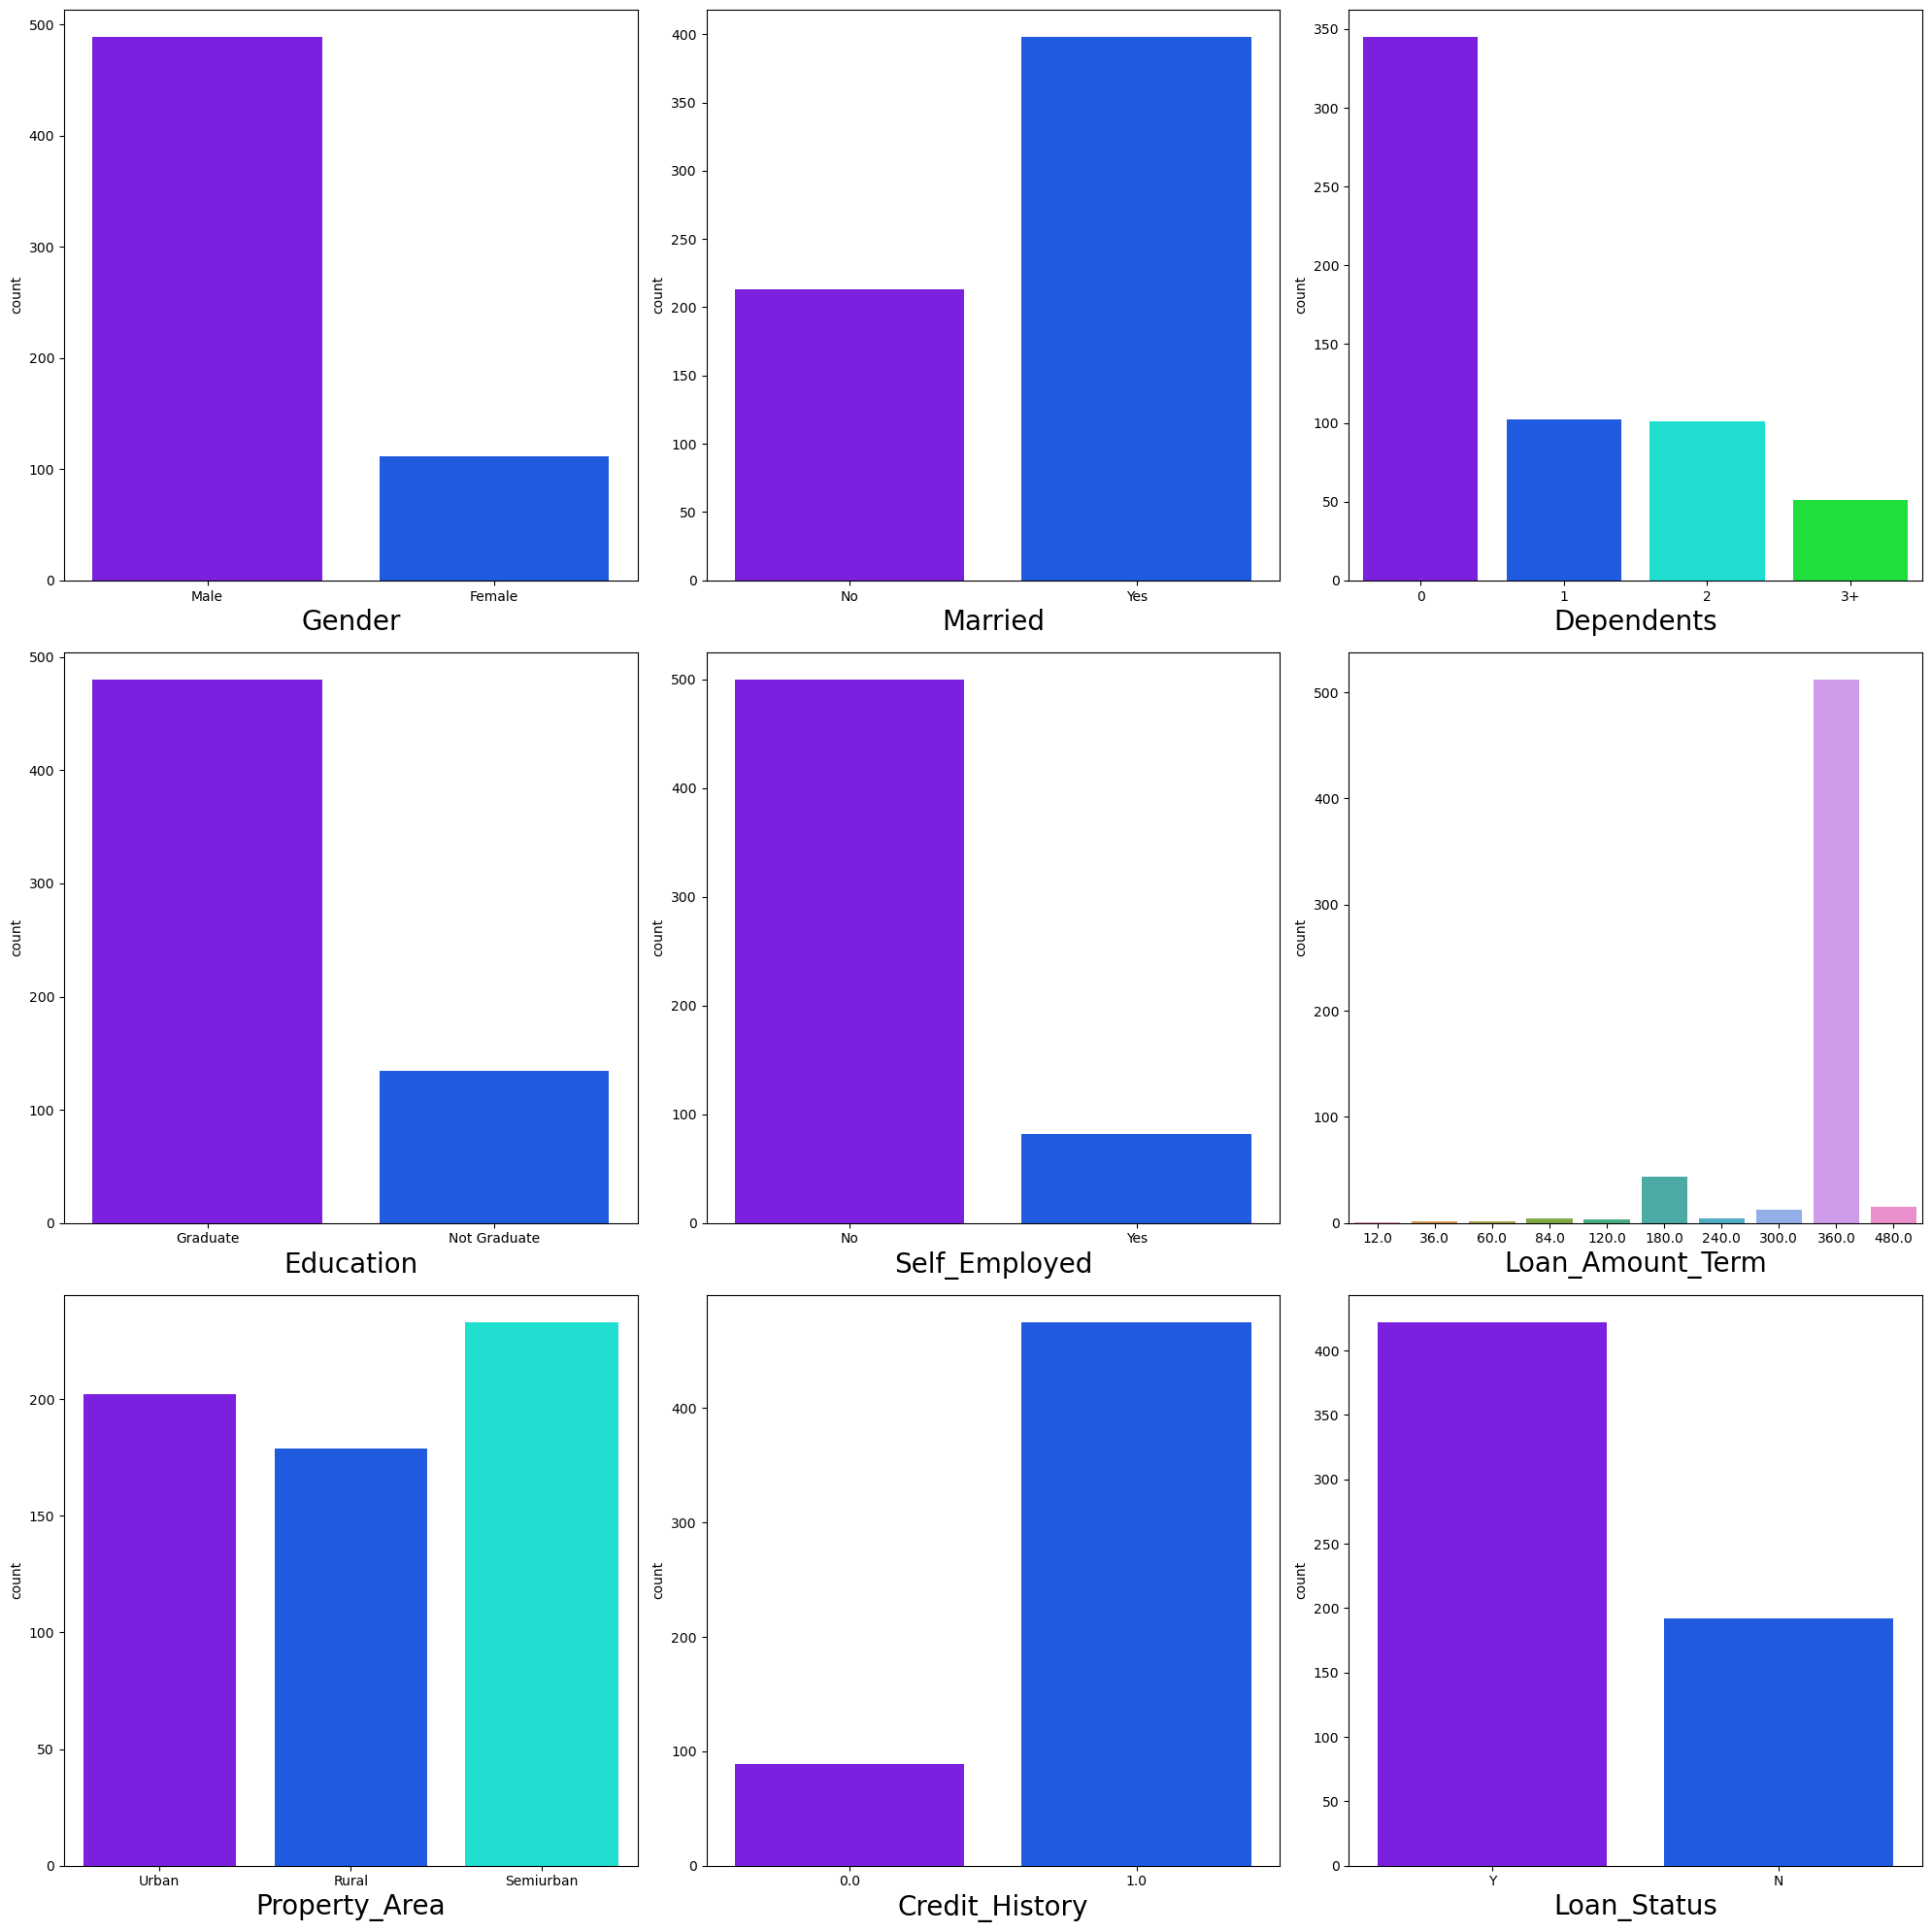

In [14]:

sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1

# List of categorical variables to plot
category = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'Loan_Amount_Term', 'Property_Area', 'Credit_History', 'Loan_Status']

# Loop through each category and create a count plot
for i in category:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(x=df[i])  
        plt.xlabel(i, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()


- Out of the total loan applications, 80% of the applicants are male. **We can explore the loan amounts for each gender and evaluate whether loan approvals differ based on gender.**
- Only 20% of applicants are self-employed. **It will be interesting to gain insights into the relationship between applicant income and loan approval for the non-self-employed category. We will also seek to identify a benchmark income range for loan approval, as well as a benchmark for loan requirements for these two categories.**
- Nearly 70% of the applicants are married, and 75% of the loan applicants are graduates.
- About 60% of the applicants have no dependents.
- Most applicants come from semi-urban areas, followed by urban and rural areas.
- 80% of individuals have a credit history. Typically, those with a credit history are more likely to receive loan approvals.
- Approximately 70% of applicants get their loans approved.

**We can impute categorical variables with the mode of that category. For numerical variables, we have the options of using the mean or median. If outliers are present, we will impute using the median.**

### Let’s check for outliers in the numerical variables with missing values by plotting a boxplot. 


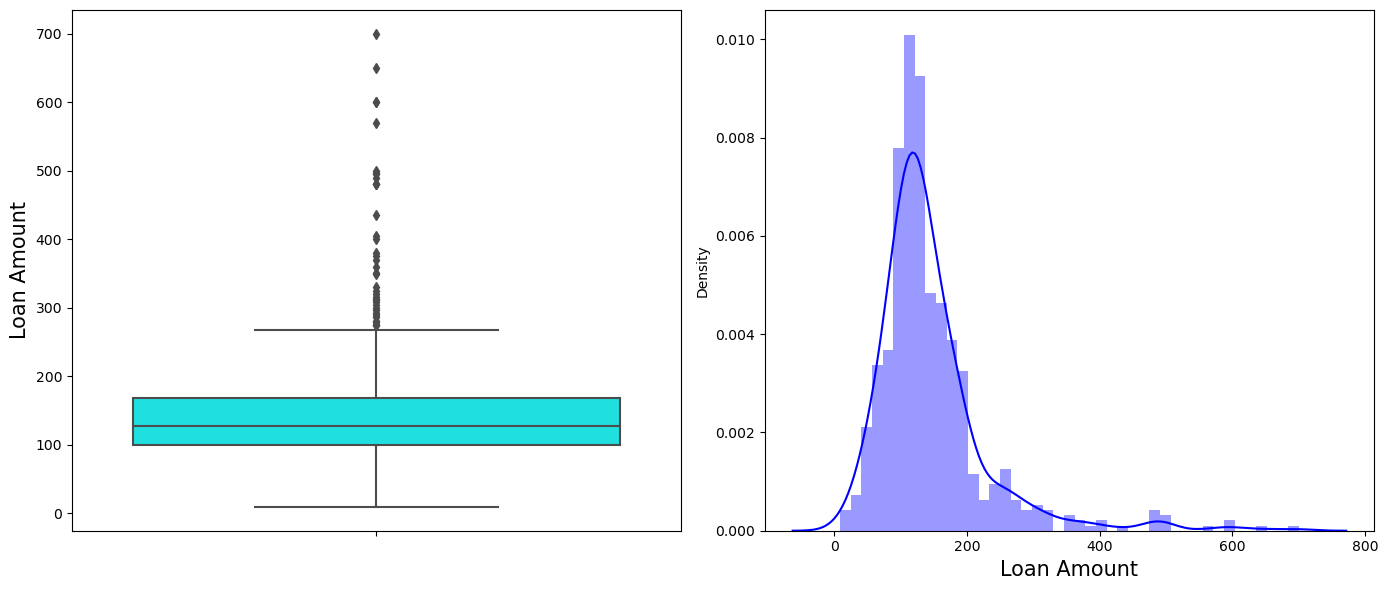

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


- The mean loan amount is greater than the median.
- The boxplot clearly shows outliers, and the distribution plot indicates a significant stretch in the feature.

**Due to the presence of extreme outliers and the sensitivity of the data to the mean, we will impute the missing values in the <u>loan amount with the median</u>.**


### Imputation of Missing values

#### Imputation details :
1. Missing values in Loan amount is impute with median value.
2. Maximum Loan term is 360 Months so Missing value in Loan amount term is replace with 360 Months.
3. Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

In [17]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

### Missing Value Check After Imputation

In [18]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0



<b> Finally, No Missing Value is Present.
We are good to go

### Statistical Matrix

<Axes: >

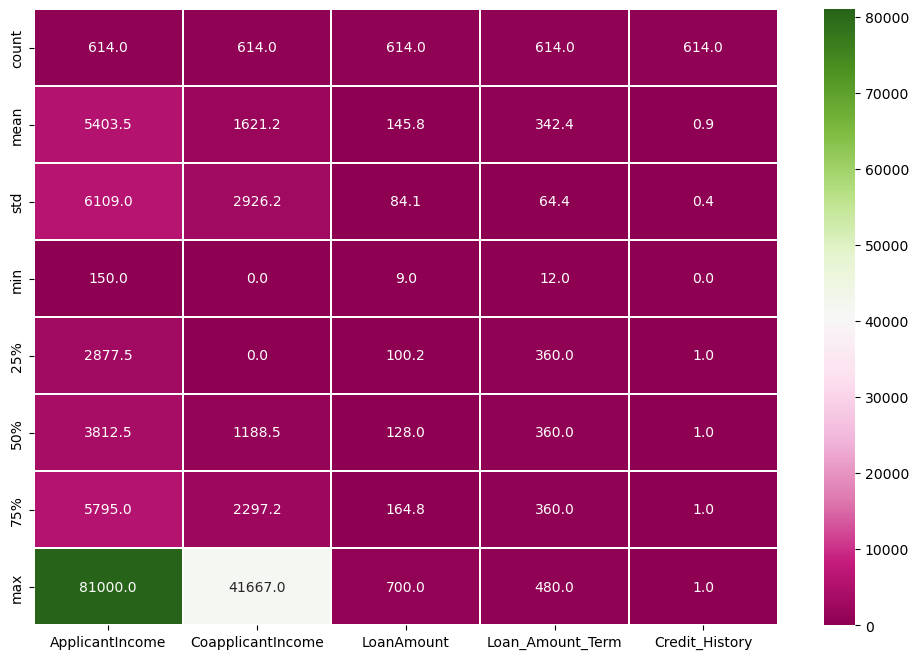

In [19]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


- In both Applicant Income and Coapplicant Income, the standard deviation is greater than the median, indicating that the data is spread out and skewed.
- Considering the top 75% of rows and the maximum, we can confidently state that outliers are present in Applicant Income, Coapplicant Income, and Loan Amount.
- Since Credit History is a categorical variable, its statistical parameters do not hold significant value.
- The minimum loan tenure is 12 months, while the maximum loan tenure is 480 months.
- The minimum Applicant Income is 150, and the maximum is 81,000.

<b> Let dive into exploration of Target and independent feature.</b>

### Target Variable

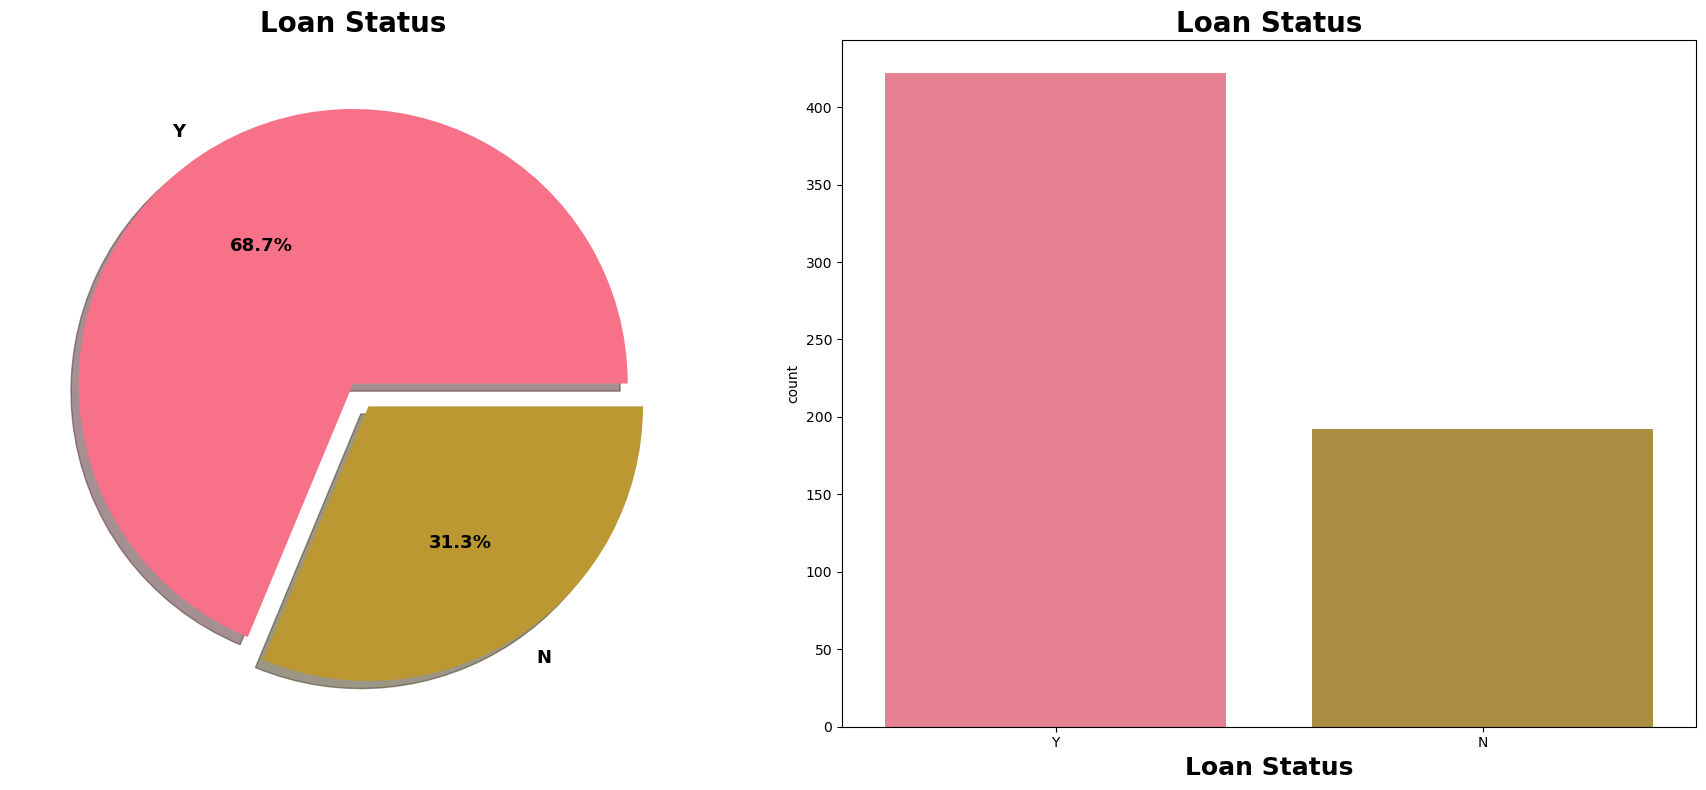

In [22]:

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Create a pie chart for Loan Status
df['Loan_Status'].value_counts().plot.pie(explode=[0, 0.1], autopct='%2.1f%%',
                                          textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0], shadow=True)
ax[0].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Create a count plot for Loan Status
sns.countplot(x='Loan_Status', data=df, ax=ax[1])  
ax[1].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Loan Status", fontsize=18, fontweight='bold')

# Show the plots
plt.show()


- 68.7% Applicants gets loan Approval.
- We can see that dataset is imbalanced in nature.


<b> Let check each feature against Target variable to gain insight into data. </b>

### Gender Vs Loan Status

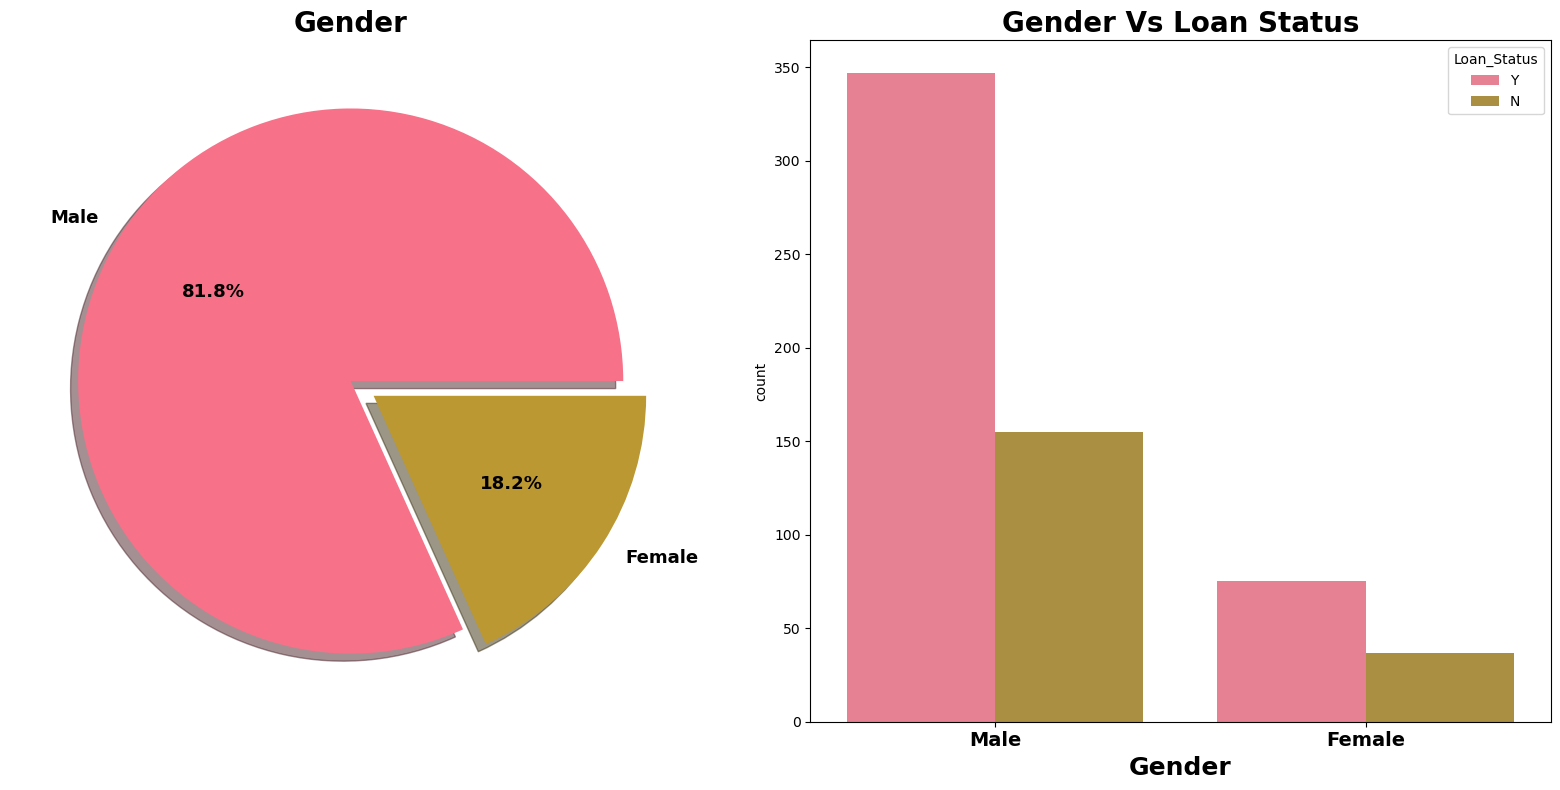

In [24]:

plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Create a pie chart for Gender
df['Gender'].value_counts().plot.pie(explode=[0, 0.1], autopct='%2.1f%%',
                                      textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0], shadow=True)
ax[0].set_title('Gender', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Create a count plot for Gender vs Loan Status
sns.countplot(x='Gender', hue='Loan_Status', data=df, ax=ax[1])  
ax[1].set_title('Gender Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Gender", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plots
plt.show()


In [25]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


- 81.8% of applicants are male.
- Regardless of gender, 65% of applicants from both genders receive loan approval. **This indicates that gender does not influence loan approval, and no discrimination is made based on gender.**


### Married Vs Loan Status

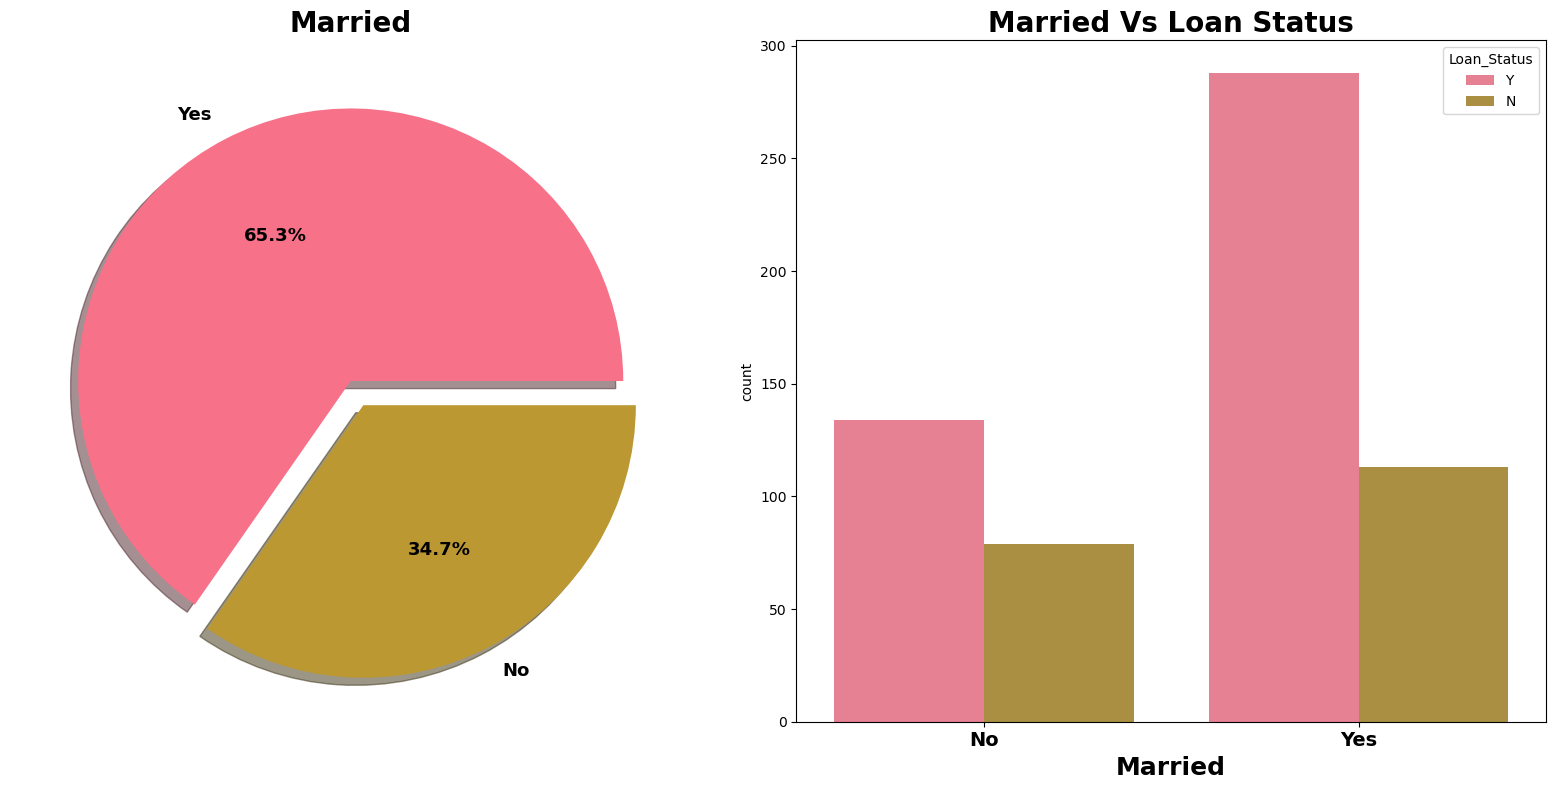

In [27]:
# Set the figure layout and color palette
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Create a pie chart for Married status
df['Married'].value_counts().plot.pie(explode=[0, 0.1], autopct='%2.1f%%',
                                       textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0], shadow=True)
ax[0].set_title('Married', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Create a count plot for Married vs Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=df, ax=ax[1])  
ax[1].set_title('Married Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Married", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [28]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

- 65.3% of loan applicants are married. The count plot indicates that **married individuals have a higher likelihood of receiving loan approval.**
- **An intriguing observation from the crosstab reveals:**
    - Unmarried women have a higher chance of loan approval compared to married women. **We will investigate which factors, such as education, employment, or income, may influence this outcome.**
    - Married men also exhibit a greater likelihood of loan approval.

### Now, let's examine how the number of dependents affects this. 


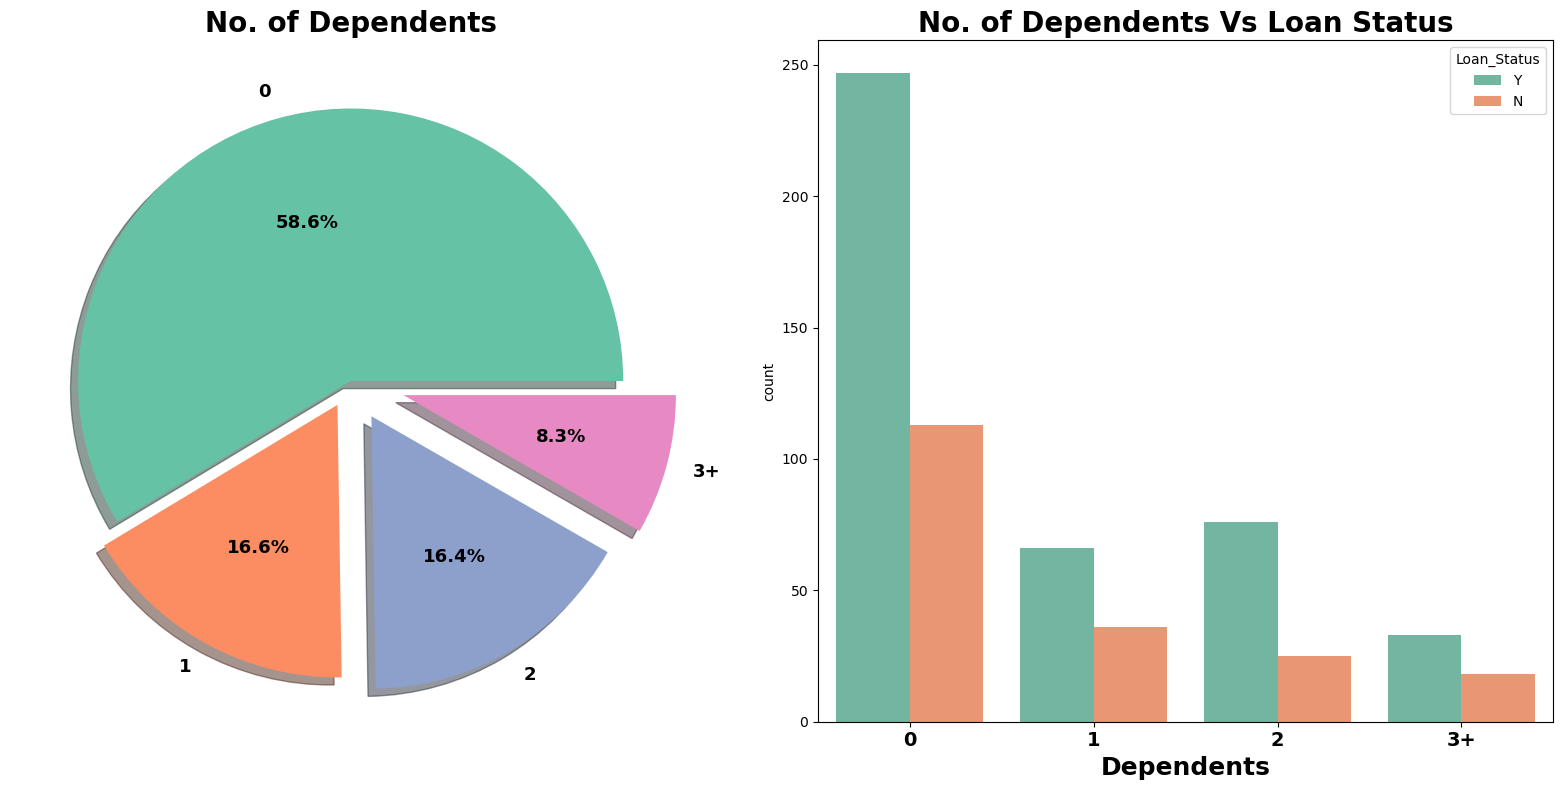

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for number of dependents
df['Dependents'].value_counts().plot.pie(
    explode=[0, 0.1, 0.15, 0.2],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('No. of Dependents', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot for number of dependents vs loan status
sns.countplot(x='Dependents', hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Dependents", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [31]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [32]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

- 58.6% of applicants have no dependents, while 33% have either one or two dependents. **It would be interesting to examine whether an increase in the number of dependents correlates with a higher loan amount requirement.**
- Females with zero dependents have a greater likelihood of receiving loan approval compared to those with dependents.
- For males, the highest loan approval rates occur among those with zero dependents, followed by those with two dependents.

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Education Vs Loan status

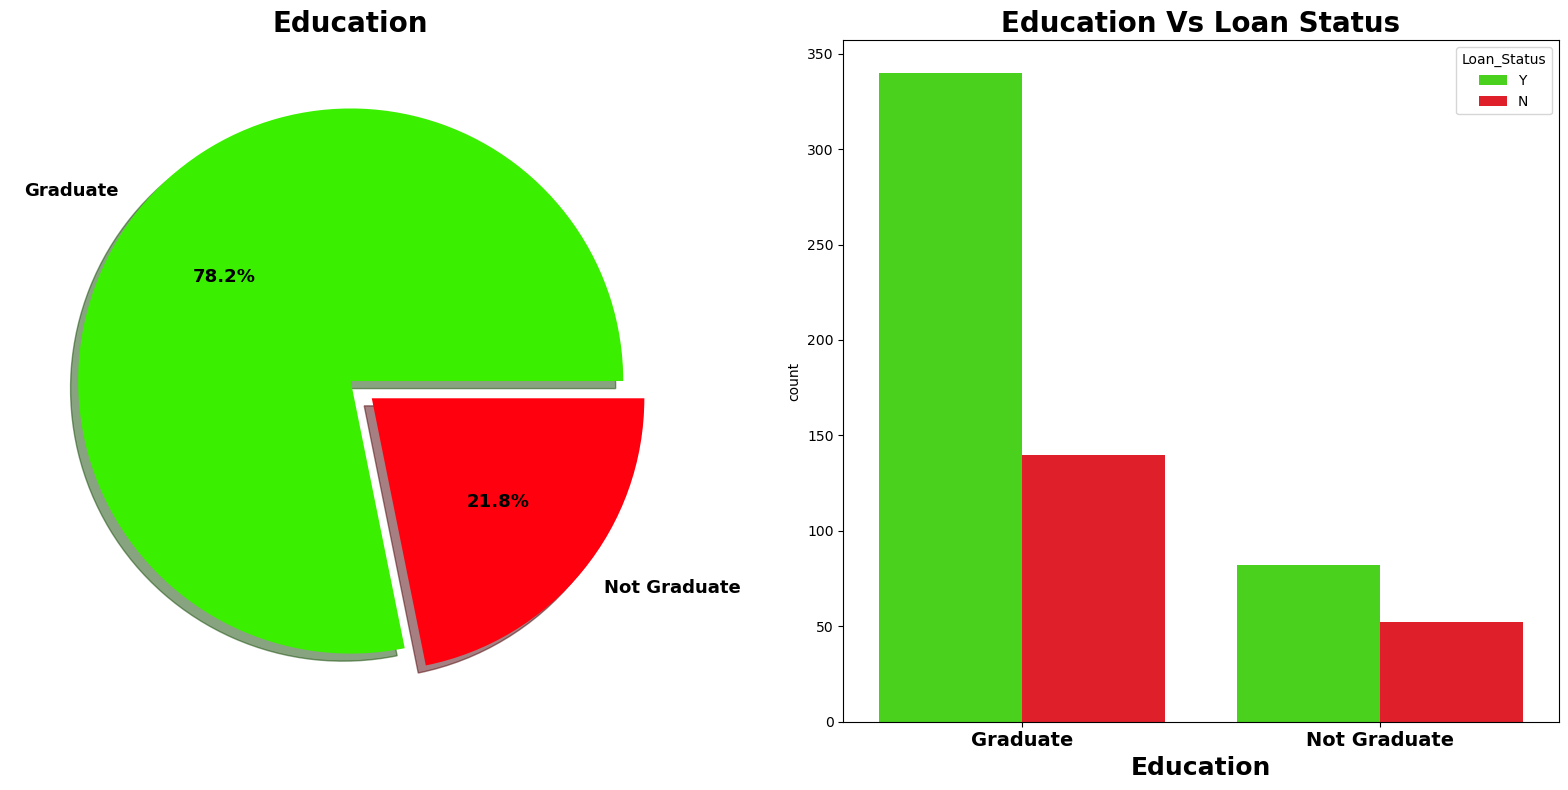

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for education
df['Education'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Education', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot for education vs loan status
sns.countplot(x='Education', hue='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Education Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Education", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [36]:
    pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

#### Comment:
- Graduate applicants are more likely to get loan approval irrespective gender.

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Encoding categorical data

In [38]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [39]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [40]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

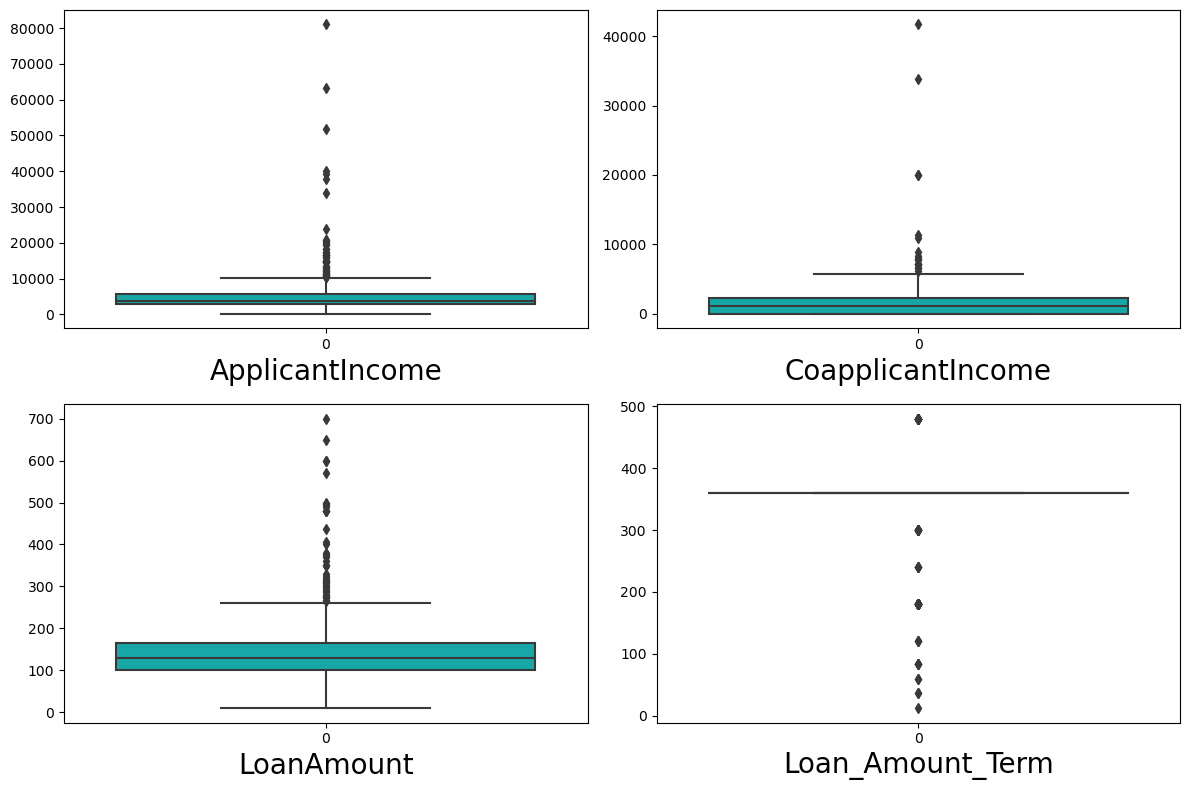

In [41]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

In [42]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [43]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [44]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


##### Data Loss

In [46]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


<b><em> We are losing 6.02 % of data and which Acceptable.</em></b>

## 2.  Skewness of features

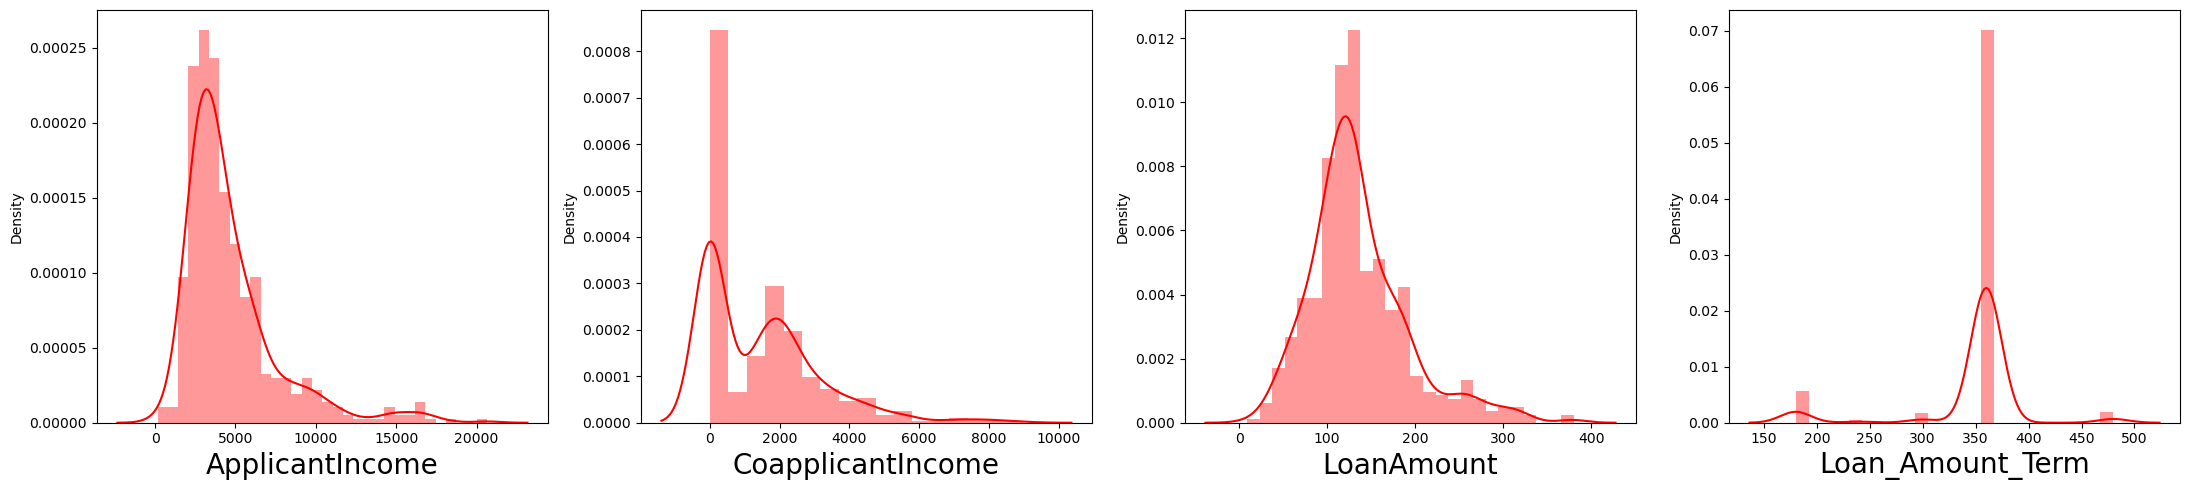

In [47]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [48]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

- <b> Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.</b>
- Other features are categorical in nature so skewness is nothing to do with these remaining feature.<u>We will ignore them.</u>
- We will yeo-johnson transformation method.

In [49]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [50]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


####  Checking skewness after using yeo-johnson method

In [51]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

<b> For Numerical variable skewness is within permissible limit.


## 3. Corrleation 

In [52]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


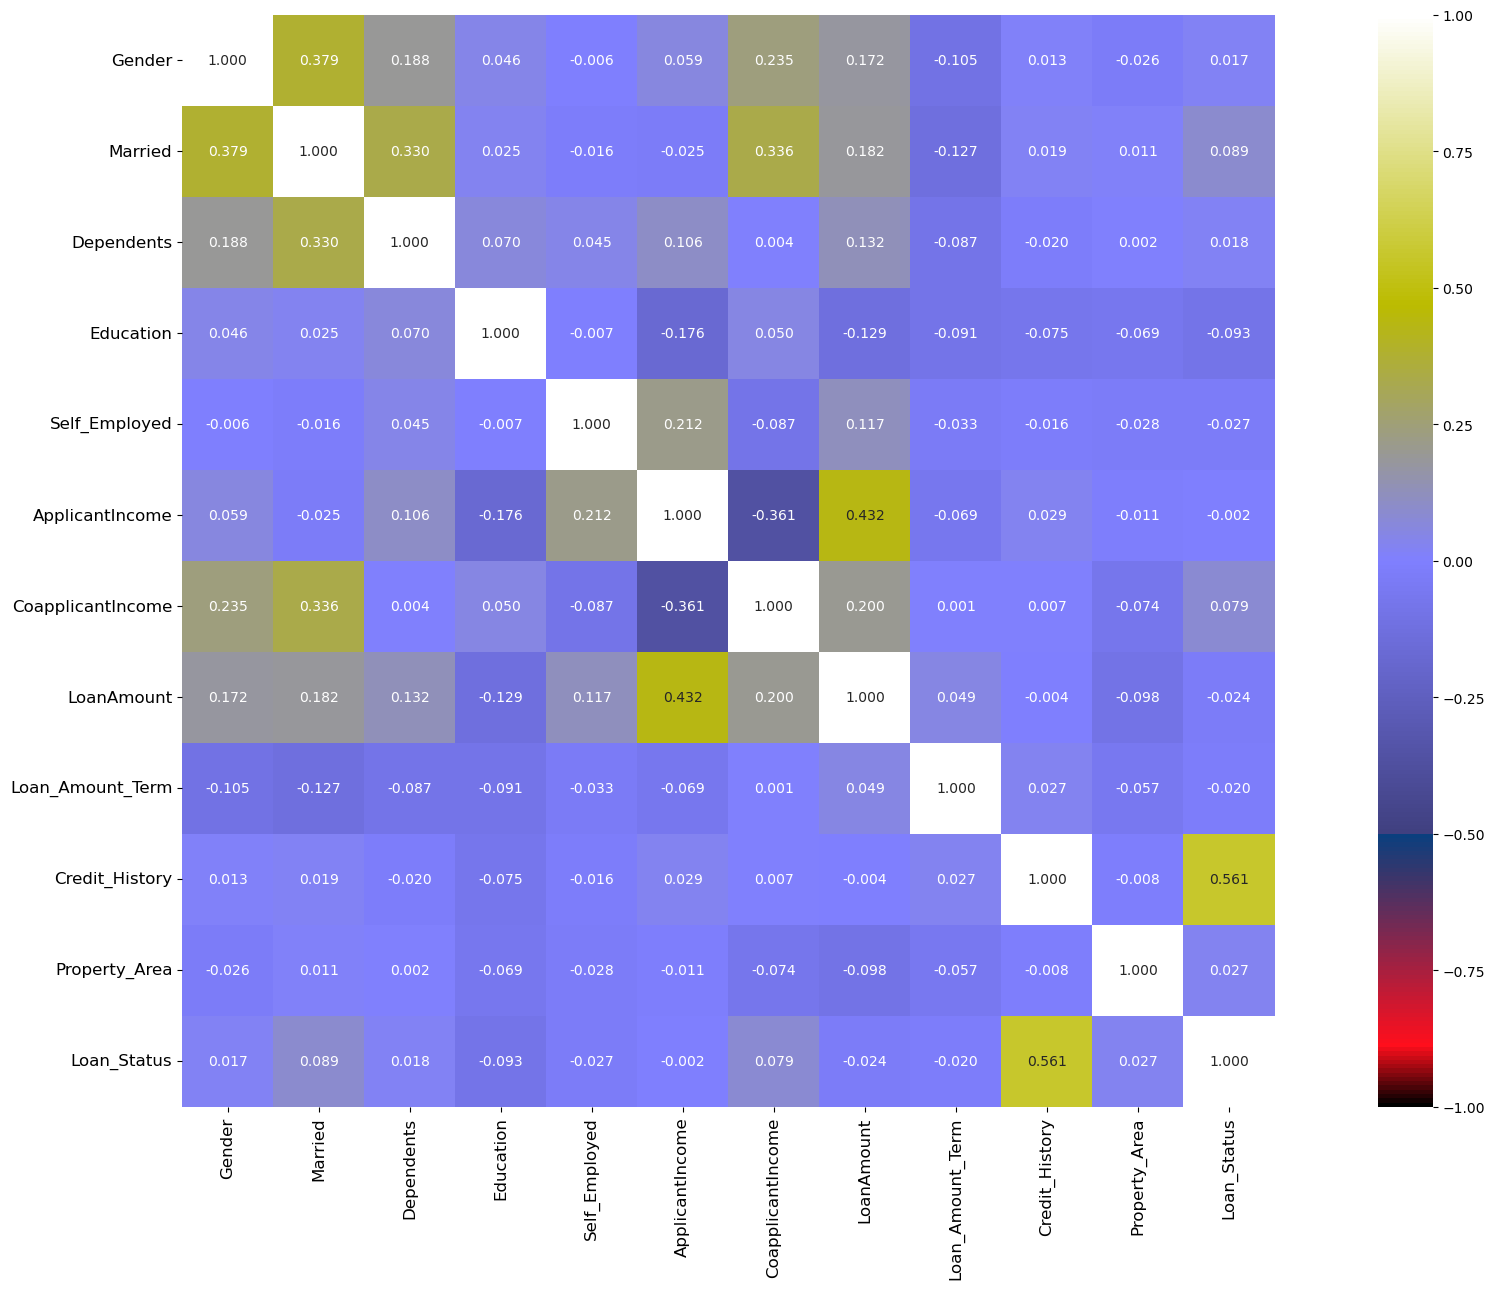

In [53]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

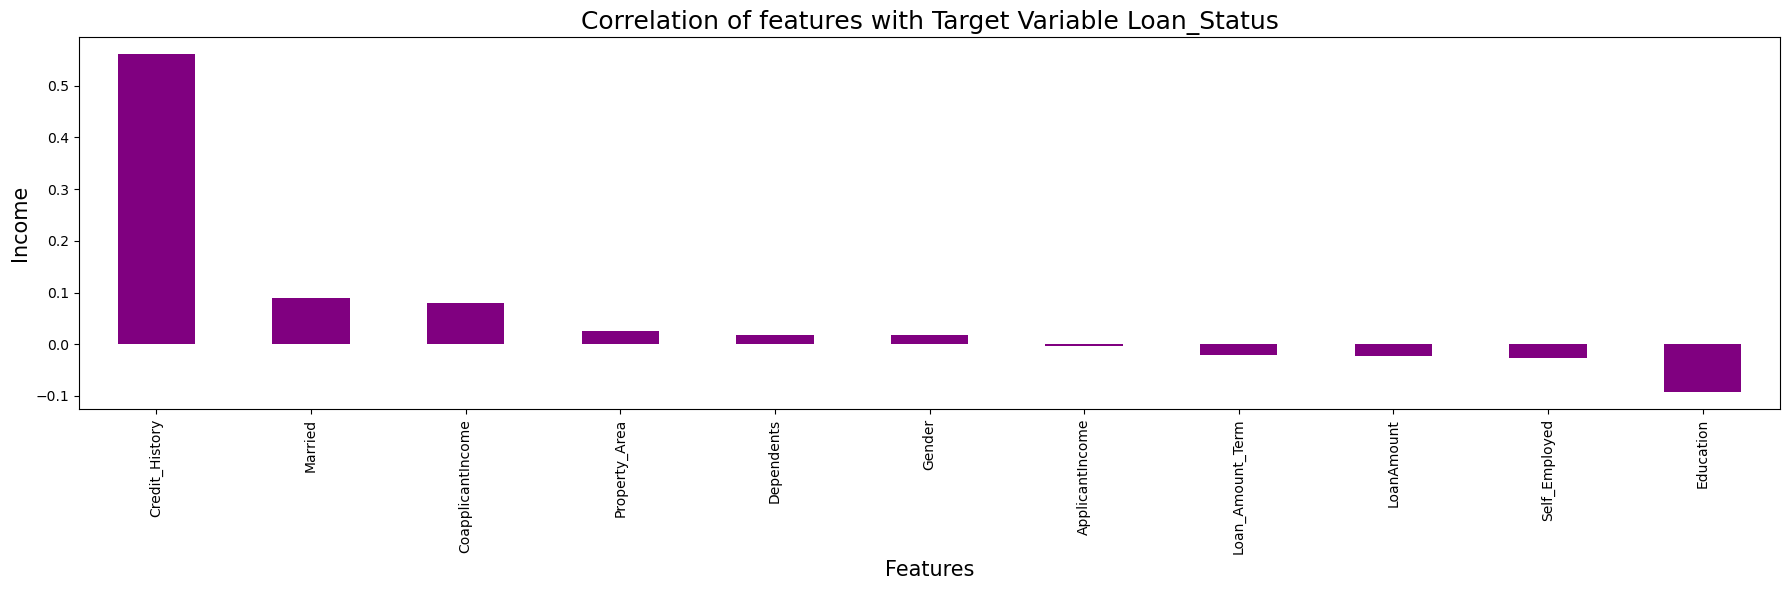

In [54]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

<b> Most of feature are poorly or moderately correlated with target variable expect Credit History. </b>
-  Maximum correlation of 0.561 exist between Credit History and Loan status.

 ## 4. Checking Multicollinearity between features using variance_inflation_factor

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


<b> All features VIF is within permissible limit of 10. 

So No Need to Worry About Multicollinearity.</b>


## 5. Balanceing Imbalanced target feature

In [56]:
df.Loan_Status.value_counts()

Loan_Status
1    398
0    179
Name: count, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balancing using SMOTE

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [59]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [60]:
Y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [61]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


### Finding best Random state

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8326359832635983 on Random_state 78


## Logistics Regression Model

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8326359832635983


Confusion matrix of Logistics Regression : 
 [[ 79  31]
 [  9 120]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       110
           1       0.79      0.93      0.86       129

    accuracy                           0.83       239
   macro avg       0.85      0.82      0.83       239
weighted avg       0.84      0.83      0.83       239



### Finding Optimal value of n_neighbors for KNN

In [66]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4840553929365547
RMSE value for k=  2 is: 0.5294664560040351
RMSE value for k=  3 is: 0.4753329597178616
RMSE value for k=  4 is: 0.5294664560040351
RMSE value for k=  5 is: 0.4527923591472056
RMSE value for k=  6 is: 0.4840553929365547
RMSE value for k=  7 is: 0.47971400126799746
RMSE value for k=  8 is: 0.47971400126799746
RMSE value for k=  9 is: 0.4527923591472056
RMSE value for k=  10 is: 0.4840553929365547
RMSE value for k=  11 is: 0.47091116165974684
RMSE value for k=  12 is: 0.47971400126799746
RMSE value for k=  13 is: 0.4527923591472056
RMSE value for k=  14 is: 0.49262341019056577
RMSE value for k=  15 is: 0.4664474480124446
RMSE value for k=  16 is: 0.4883581921595791
RMSE value for k=  17 is: 0.4840553929365547
RMSE value for k=  18 is: 0.4883581921595791
RMSE value for k=  19 is: 0.47091116165974684
RMSE value for k=  20 is: 0.4753329597178616
RMSE value for k=  21 is: 0.4664474480124446
RMSE value for k=  22 is: 0.4883581921595791
RMSE value fo

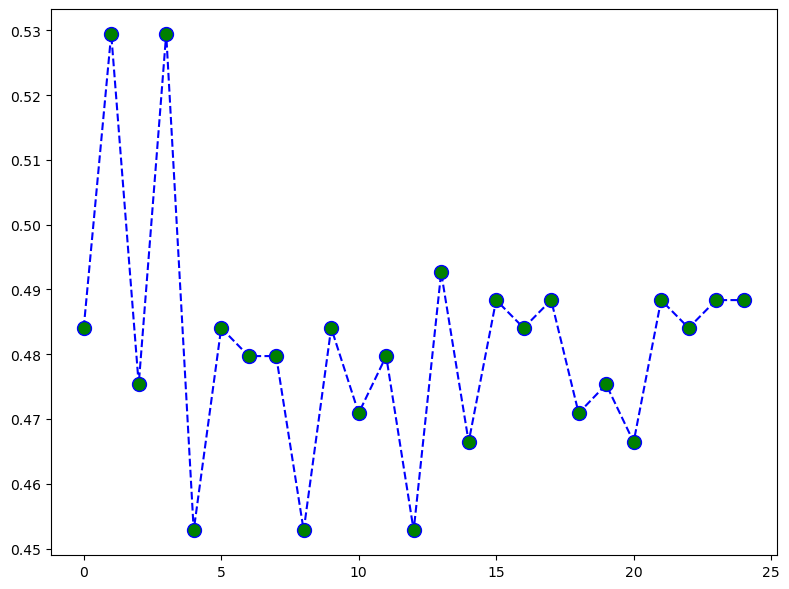

In [67]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)


At 
𝑘
=
5
, we achieve the lowest RMSE value of approximately 0.45, after which the RMSE increases with higher 
𝑘
k values. Therefore, we can confidently conclude that 
𝑘
=
5
 yields the best results in this scenario.


## Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix SVC(probability=True) is


Accuracy Score :
 0.7907949790794979


Confusion matrix : 
 [[ 76  34]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.69      0.75       110
           1       0.77      0.88      0.82       129

    accuracy                           0.79       239
   macro avg       0.80      0.78      0.79       239
weighted avg       0.80      0.79      0.79       239





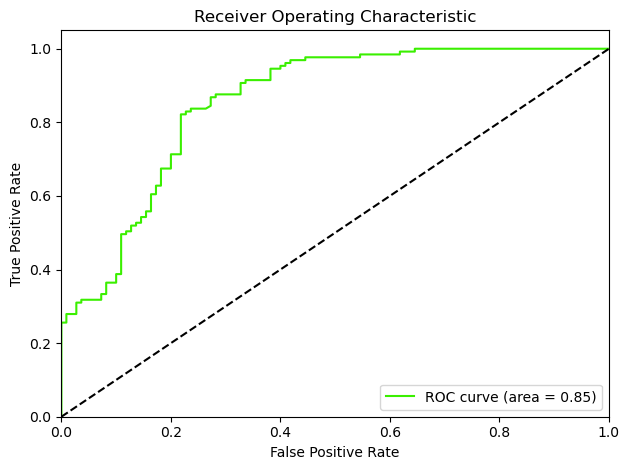

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7907949790794979


Confusion matrix : 
 [[ 70  40]
 [ 10 119]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.64      0.74       110
           1       0.75      0.92      0.83       129

    accuracy                           0.79       239
   macro avg       0.81      0.78      0.78       239
weighted avg       0.81      0.79      0.79       239





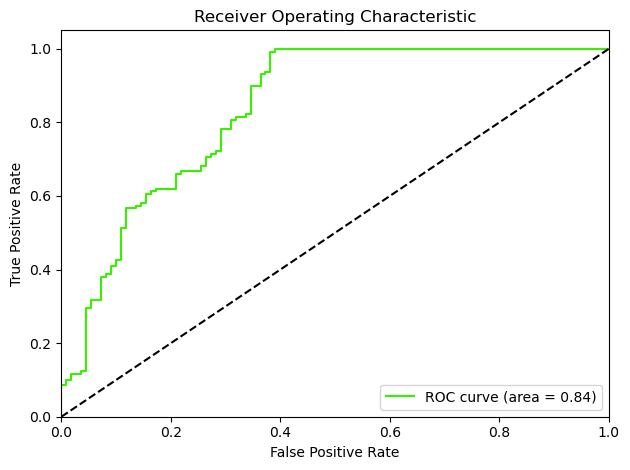

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.8326359832635983


Confusion matrix : 
 [[ 90  20]
 [ 20 109]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.84      0.84      0.84       129

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





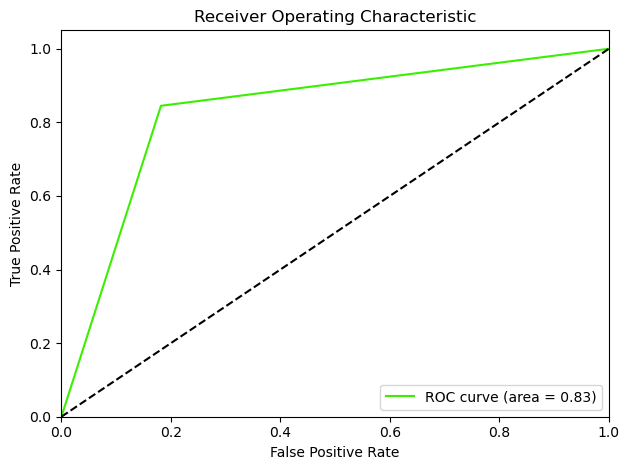

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier() is


Accuracy Score :
 0.7949790794979079


Confusion matrix : 
 [[ 86  24]
 [ 25 104]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.78      0.78       110
           1       0.81      0.81      0.81       129

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.80      0.79      0.80       239





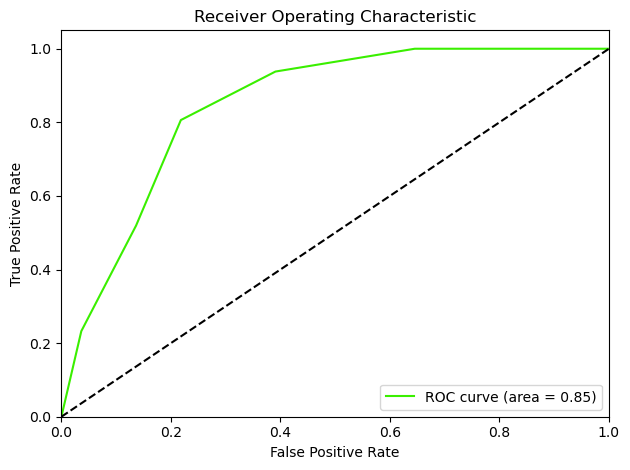

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8661087866108786


Confusion matrix : 
 [[ 95  15]
 [ 17 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.88      0.87      0.88       129

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239





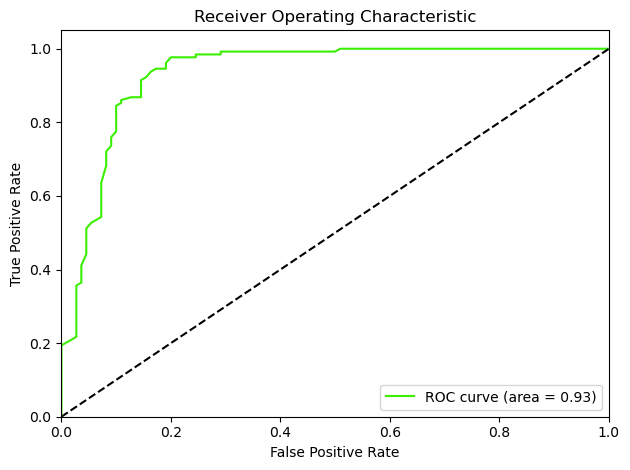

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8535564853556485


Confusion matrix : 
 [[ 93  17]
 [ 18 111]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.87      0.86      0.86       129

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.85      0.85      0.85       239





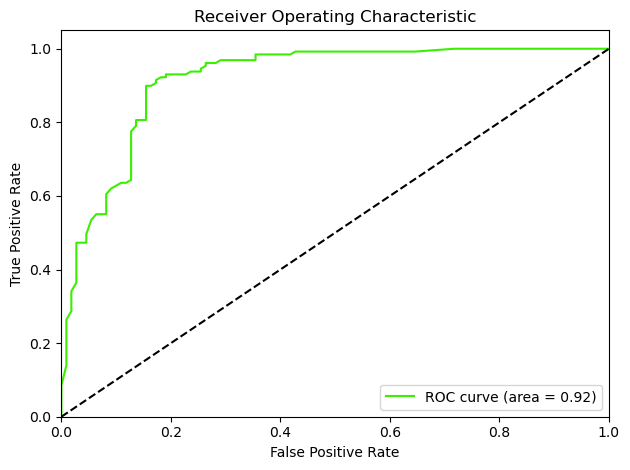

In [69]:
from sklearn.metrics import roc_curve, auc

model = [ 
    SVC(probability=True),  
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for m in model:
    m.fit(X_train, Y_train)
    y_pred = m.predict(X_test)
    y_pred_proba = m.predict_proba(X_test)[:, 1]  

    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix', m, 'is' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(Y_test, y_pred))
    print('\n')

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    print('============================================================================================================')



# CrossValidation :

In [70]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 5),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.70625    0.72955975 0.76100629 0.81132075 0.74842767]
Mean Score : 0.7513128930817611
Std deviation : 0.03523377220465657




Cross Validation Score SVC() :

Score : [0.69375    0.71069182 0.74213836 0.77358491 0.78616352]
Mean Score : 0.7412657232704403
Std deviation : 0.03536555009076744




Cross Validation Score GaussianNB() :

Score : [0.66875    0.73584906 0.75471698 0.7672956  0.74842767]
Mean Score : 0.7350078616352201
Std deviation : 0.034646357531294796




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7625     0.6918239  0.77358491 0.77987421 0.78616352]
Mean Score : 0.7587893081761007
Std deviation : 0.034383035773549495




Cross Validation Score KNeighborsClassifier() :

Score : [0.7375     0.70440252 0.74842767 0.75471698 0.79245283]
Mean Score : 0.7475000000000002
Std deviation : 0.028393997558389596




Cross Validation Score RandomForestClassifier() :

Score : [0.775      0.78616352 0.86163522

#### We can see that  RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.  we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameter = {
    'bootstrap': [True],  
    'max_depth': [10, 20],  
    'max_features': ['auto'],  
    'criterion': ['gini', 'entropy'], 
    'n_estimators': [5, 10, 15]  
}



In [75]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 1/5; 1/12] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.759 total time=   0.0s
[CV 2/5; 1/12] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 2/5; 1/12] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.732 total time=   0.0s
[CV 3/5; 1/12] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 3/5; 1/12] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 4/5; 1/12] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5
[CV 4/5; 1/12] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.712 total time=   0.0s
[CV 5/5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'max_features': ['auto'],
                         'n_estimators': [5, 10, 15]},
             verbose=10)

In [76]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 15}

# Final Model

In [77]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 15, max_depth=10 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8702928870292888


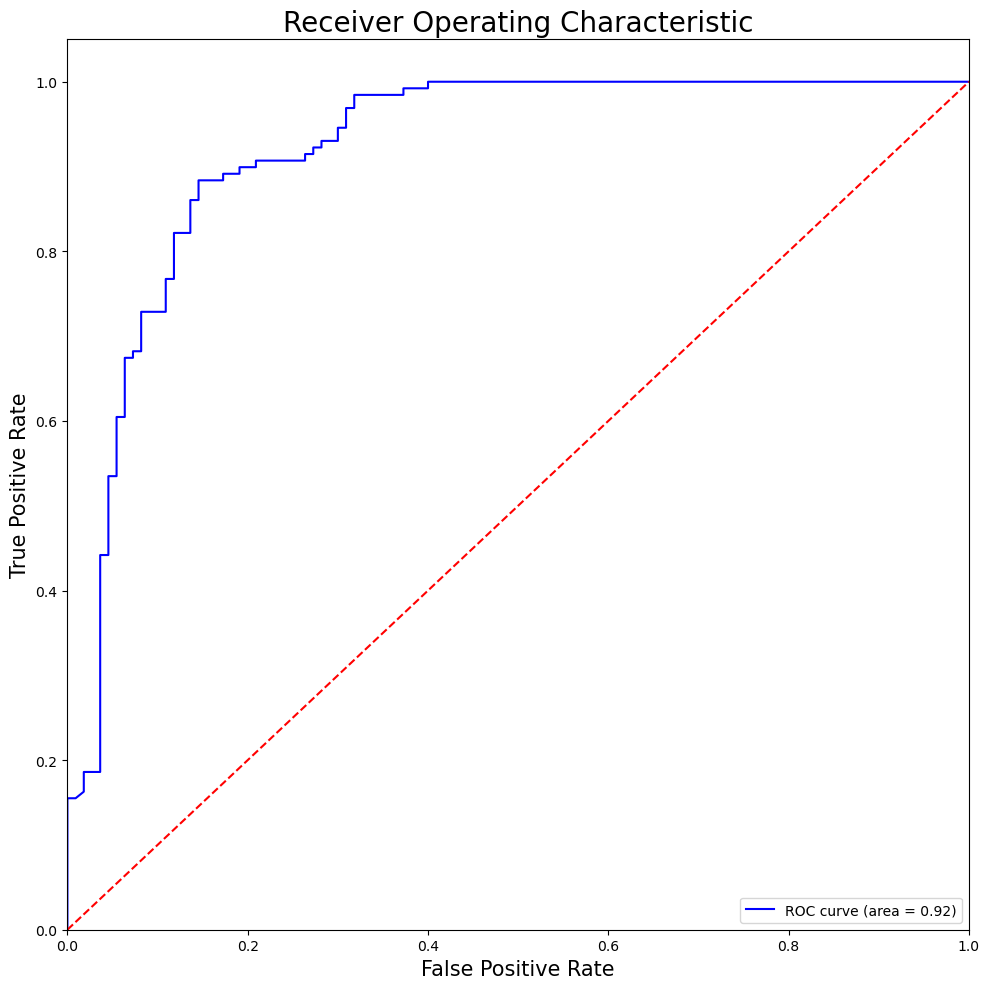

AUC Score :
 0.9204721634954193


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_probs = Final_mod.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.legend(loc='lower right')
plt.show()

# AUC Score
print('\033[1m' + 'AUC Score :' + '\033[0m\n', roc_auc)


## Saving model

In [80]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']

# -- END OF PROJECT 2 -- 